In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
np.random.seed(1)
n = 1000
x1 = np.random.normal(loc=0.0, scale=1.0, size=n)
temp = np.random.normal(loc=0.0, scale=3.0, size=n)
x2 = x1 + temp
x3 = 2*x1 + x2
X = np.array([x1, x2, x3]) 
print('X shape:',X.shape,'\n')

# Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
cov = np.cov(X)
print('Covariance Matrix: \n',cov,'\n')
l, V = la.eig(cov)
l = np.real_if_close(l)
print('Eigendecomposition: eigenvalues:\n',l,'\n')
print('Eigendecomposition: eigenvectors:\n',V,'\n')

# Find the eigenvectors and eigenvalues using the SVD. 
U, s, Vt = la.svd(X)
l_svd = s**2/(n-1)
V_svd = U
print('SVD: eigenvalues:\n',l_svd,'\n')
print('SVD: eigenvectors:\n',V_svd,'\n')

#Check that the two procedures yield to same result
m, n = U.shape[0], Vt.shape[0]
S = np.zeros((m,n))
for i in range(min(m,n)):
    S[i,i] = s[i]

SVD = np.dot(U, np.dot(S, Vt))
print('Are the SVD and X matrices the same ?', np.allclose(SVD, X),'\n')

EIG = np.dot(V, np.dot(np.diag(np.real_if_close(l)), la.inv(V)))
print('Are EIG and cov matrices the same ?', np.allclose(EIG, cov),'\n')

# What percent of the total dataset's variability is explained by the principal components? 
Lambda = np.diag(l)
print('The percentage of the variability explained by the first PC is %.2f%%' % (100*Lambda[0, 0]/Lambda.trace())) 

# Given how the dataset was constructed, do these make sense? 
print('This make sense because the 3 variables are correlated\n')

# Reduce the dimensionality of the system so that at least 99% of the total variability is retained
print('By selecting the first and the third component we will keep %.1f%% of the variability'%(100*(Lambda[0, 0]+Lambda[2, 2])/Lambda.trace())) 

# Redefine the data according to the new basis from the PCA
Xp = np.dot(V.T, X)

X shape: (3, 1000) 

Covariance Matrix: 
 [[ 0.96333244  1.02965621  2.9563211 ]
 [ 1.02965621 10.65433226 12.71364468]
 [ 2.9563211  12.71364468 18.62628688]] 

Eigendecomposition: eigenvalues:
 [2.82921436e+01 1.64537133e-15 1.95180800e+00] 

Eigendecomposition: eigenvectors:
 [[-0.10896172 -0.81649658  0.56697502]
 [-0.58543803 -0.40824829 -0.70042534]
 [-0.80336147  0.40824829  0.43352471]] 

SVD: eigenvalues:
 [2.83471156e+01 1.95235587e+00 2.45220723e-32] 

SVD: eigenvectors:
 [[-0.10907973  0.56695233 -0.81649658]
 [-0.58529223 -0.70054717 -0.40824829]
 [-0.80345169  0.43335749  0.40824829]] 

Are the SVD and X matrices the same ? True 

Are EIG and cov matrices the same ? True 

The percentage of the variability explained by the first PC is 93.55%
This make sense because the 3 variables are correlated

By selecting the first and the third component we will keep 100.0% of the variability


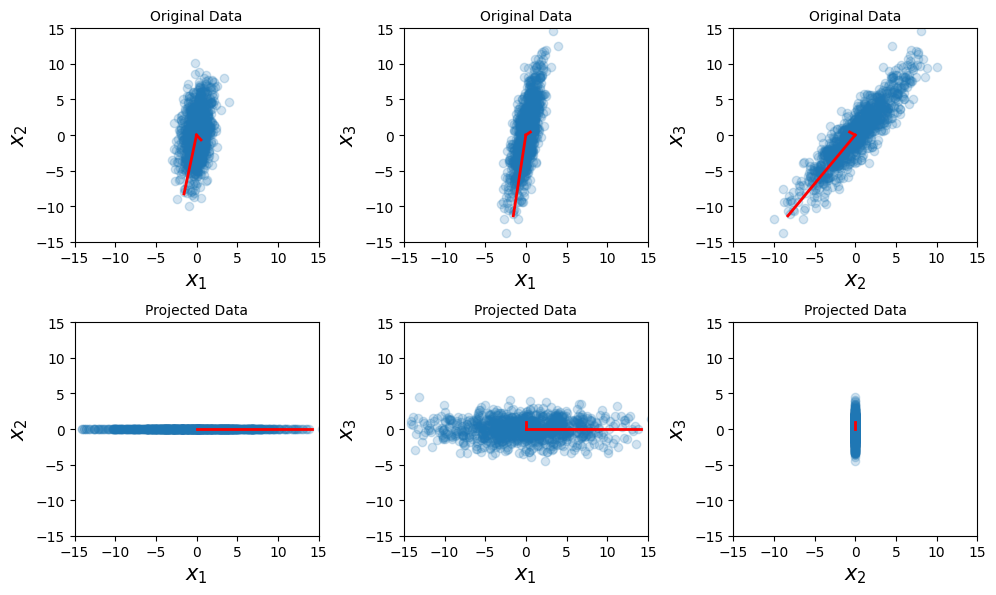

In [3]:
fig, ax = plt.subplots(2,3, constrained_layout=True, figsize=(10,6))
scale_factor = 0.5

plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=False)
plt.rc('mathtext', fontset='cm')
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
plt.rc('axes', titlesize=10)


ax[0,0].scatter(X[0,:], X[1,:], alpha=0.2)
ax[0,0].axis([-15,15,-15,15])
ax[0,0].set_title('Original Data')
ax[0,0].set_xlabel('$x_1$', size=15)
ax[0,0].set_ylabel('$x_2$', size=15)
for li, vi in zip(l, V.T): 
    ax[0,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax[0,1].scatter(X[0,:], X[2,:], alpha=0.2)
ax[0,1].axis([-15,15,-15,15])
ax[0,1].set_title('Original Data')
ax[0,1].set_xlabel('$x_1$', size=15)
ax[0,1].set_ylabel('$x_3$', size=15)
for li, vi in zip(l, V.T): 
    ax[0,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    
ax[0,2].scatter(X[1,:], X[2,:], alpha=0.2)
ax[0,2].axis([-15,15,-15,15])
ax[0,2].set_title('Original Data')
ax[0,2].set_xlabel('$x_2$', size=15)
ax[0,2].set_ylabel('$x_3$', size=15)
for li, vi in zip(l, V.T): 
    ax[0,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    

# projecting the data on the new basis 
Xp = np.dot(V.T,X)

ax[1,0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax[1,0].axis([-15,15,-15,15])
ax[1,0].set_title('Projected Data')
ax[1,0].set_xlabel('$x_1$', size=15)
ax[1,0].set_ylabel('$x_2$', size=15)
for li, vi in zip(l, np.dot(V.T,V)): 
    ax[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
ax[1,1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax[1,1].axis([-15,15,-15,15])
ax[1,1].set_title('Projected Data')
ax[1,1].set_xlabel('$x_1$', size=15)
ax[1,1].set_ylabel('$x_3$', size=15)
for li, vi in zip(l, np.dot(V.T,V)): 
    ax[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    
ax[1,2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)
ax[1,2].axis([-15,15,-15,15])
ax[1,2].set_title('Projected Data')
ax[1,2].set_xlabel('$x_2$', size=15)
ax[1,2].set_ylabel('$x_3$', size=15)
for li, vi in zip(l, np.dot(V.T,V)): 
    ax[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    
plt.tight_layout()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [5]:
# Ex. 2.

# add uncorrelated random noise

N = 10
random_noise = np.zeros((N, n))

for i in range(N):
    random_noise[i] = np.random.normal(0, 1/20, n)
    
for i in range(3):
    for j in range(N):
        X[i] = X[i] + random_noise[j]

# covariance matrix
covn = np.cov(X)
# find the eigenvectors of the covariance matrix
ln, Vn = la.eig(covn)
# take only the real component
ln = np.real_if_close(ln)

print('Covariance Matrix:')
print(covn,'\n')

print("Eigendecomposition of the covariance matrix:")
print("Eigenvalues:\n", ln)
print("Eigenvectors:\n", Vn)

Lambdan = np.diag(ln) #sort the eigenvalues in descending order
pn = Lambdan[0,0]/Lambdan.trace()
p2n = (Lambdan[0,0]+Lambdan[2,2])/Lambdan.trace()

print("\nBy selecting the first component, we retain {:.4}% of the total variability.".format(np.real_if_close(pn)*100) )
print("By reducing the dimensionality to the two largest eigenvalues, {:.4}% of the total dataset's variability is explained.".format(np.real_if_close(p2n)*100))


Covariance Matrix:
[[ 0.99735285  1.05850117  2.96756692]
 [ 1.05850117 10.67800178 12.71971507]
 [ 2.96756692 12.71971507 18.61475812]] 

Eigendecomposition of the covariance matrix:
Eigenvalues:
 [28.30462152  0.03435466  1.95113657]
Eigenvectors:
 [[-0.10996121 -0.81476362  0.56927039]
 [-0.58595458 -0.40949218 -0.69926632]
 [-0.80284853  0.41045876  0.43238622]]

By selecting the first component, we retain 93.45% of the total variability.
By reducing the dimensionality to the two largest eigenvalues, 99.89% of the total dataset's variability is explained.


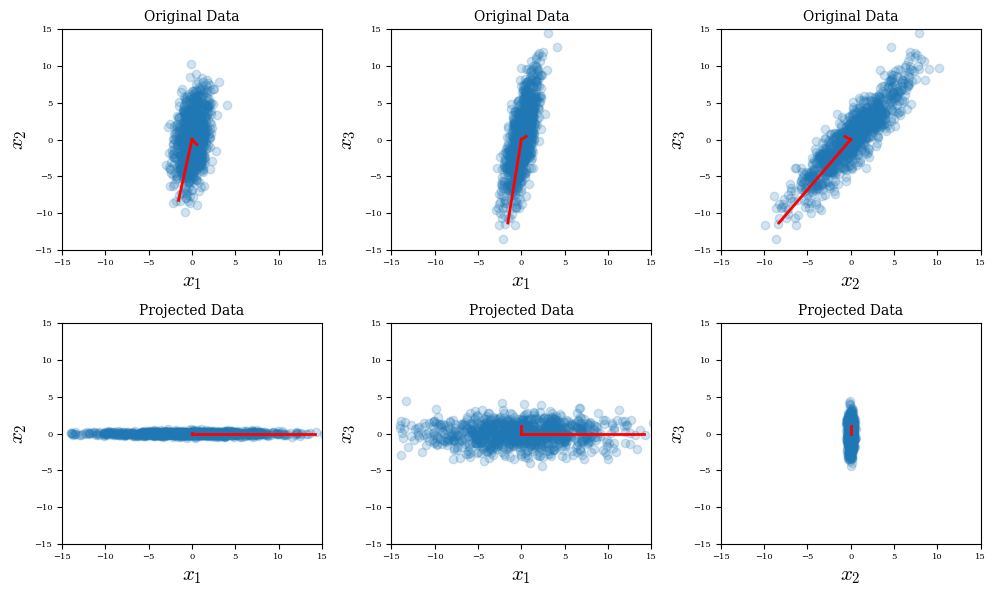

In [6]:
fig, ax = plt.subplots(2,3, constrained_layout=True, figsize=(10,6))
scale_factor = 0.5

plt.rc('font', family='serif', size=8)
plt.rc('text', usetex=False)
plt.rc('mathtext', fontset='cm')
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
plt.rc('axes', titlesize=10)


ax[0,0].scatter(X[0,:], X[1,:], alpha=0.2)
ax[0,0].axis([-15,15,-15,15])
ax[0,0].set_title('Original Data')
ax[0,0].set_xlabel('$x_1$', size=15)
ax[0,0].set_ylabel('$x_2$', size=15)
for li, vi in zip(ln, Vn.T): 
    ax[0,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)

ax[0,1].scatter(X[0,:], X[2,:], alpha=0.2)
ax[0,1].axis([-15,15,-15,15])
ax[0,1].set_title('Original Data')
ax[0,1].set_xlabel('$x_1$', size=15)
ax[0,1].set_ylabel('$x_3$', size=15)
for li, vi in zip(ln, Vn.T): 
    ax[0,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    
ax[0,2].scatter(X[1,:], X[2,:], alpha=0.2)
ax[0,2].axis([-15,15,-15,15])
ax[0,2].set_title('Original Data')
ax[0,2].set_xlabel('$x_2$', size=15)
ax[0,2].set_ylabel('$x_3$', size=15)
for li, vi in zip(ln, Vn.T): 
    ax[0,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    

# projecting the data on the new basis 
Xp = np.dot(Vn.T,X)

ax[1,0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax[1,0].axis([-15,15,-15,15])
ax[1,0].set_title('Projected Data')
ax[1,0].set_xlabel('$x_1$', size=15)
ax[1,0].set_ylabel('$x_2$', size=15)
for li, vi in zip(ln, np.dot(Vn.T,Vn)): 
    ax[1,0].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    
ax[1,1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax[1,1].axis([-15,15,-15,15])
ax[1,1].set_title('Projected Data')
ax[1,1].set_xlabel('$x_1$', size=15)
ax[1,1].set_ylabel('$x_3$', size=15)
for li, vi in zip(ln, np.dot(Vn.T,Vn)): 
    ax[1,1].plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    
ax[1,2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)
ax[1,2].axis([-15,15,-15,15])
ax[1,2].set_title('Projected Data')
ax[1,2].set_xlabel('$x_2$', size=15)
ax[1,2].set_ylabel('$x_3$', size=15)
for li, vi in zip(ln, np.dot(Vn.T,Vn)): 
    ax[1,2].plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    
plt.tight_layout()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 